# **INTRODUCTION**

The National Football League (NFL) stands as one of the most popular and prestigious professional American football leagues globally, serving as the pinnacle of the sport. Founded in 1920, the NFL has evolved into a cultural phenomenon, captivating millions of fans with its thrilling games, iconic teams, and legendary athletes.

Comprising 32 teams divided evenly between the National Football Conference (NFC) and the American Football Conference (AFC), the NFL orchestrates an annual season that culminates in the highly anticipated Super Bowl, a championship game that captivates audiences worldwide. Each team represents a distinct city or region, fostering fierce rivalries and passionate fanbases.

The NFL is renowned for its physical and strategic style of play, where teams compete to advance the ball across the field and score points by crossing the opponent's goal line or kicking field goals. The game unfolds in four quarters, each featuring intense action and strategic decision-making.

Beyond the athleticism on display, the NFL has become a cultural phenomenon, intertwining sports with entertainment. The league's annual draft, where teams select the brightest college talents, is a major event, and Super Bowl Sunday has transcended sports to become a significant cultural event, featuring high-profile halftime shows and memorable commercials.

The NFL's commitment to innovation is evident in initiatives like the Big Data Bowl, where cutting-edge analytics and technology are harnessed to gain deeper insights into the game. With a vast fanbase, a rich history, and a constant drive for excellence, the NFL remains a central and dynamic force in the world of sports.

# KICKING OFF WITH A TOUCHDOWN OF DATA: A PLAYFUL INTRODUCTION TO OUR DATASETS

We have leveraged the following datasets for informative and effective insights in the end for desirable actions. Along with that we have created an additional dataset("Victory Dataset") for deriving important information which can help us in our further analysis. 

1) Games Dataset:- The NFL Games Dataset provides a comprehensive overview of individual games throughout various seasons. Each entry in the dataset is identified by a unique numeric "gameId".

2) Player Dataset:- The NFL Plays Dataset offers detailed insights into individual plays during football games, providing a comprehensive understanding of various play-related factors. 

3) Plays Dataset:- Dive into the realm of the gridiron warriors with the NFL Player Information Dataset, an intricate tapestry of details that merges the players with life. Uncover the essence of each player, from physical attributes to their journey through collegiate battlefields. 

4) Tracking_week_1 Dataset:- Embark on a journey into the heart of the gridiron with the NFL Player Tracking Dataset, a dynamic canvas capturing the intricate movements of players in the heat of battle. This dataset unfolds the tapestry of every play, providing a granular view of player positions, speeds, accelerations, and more.

5) Victory Dataset:- Step into the realm of triumph with the Victory Dataset, a collection singularly devoted to the resounding echoes of victory in the exhilarating world of NFL showdowns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import plotly.express as px
!pip install pingouin 
import pingouin as pp 
import matplotlib.patches as patches

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
games= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/games.csv")
players= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/players.csv")
plays= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/plays.csv")
tackles= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/tackles.csv")

In [3]:
final_data = tackles.merge(players, on='nflId', how='left')
final_data = final_data.merge(games, on='gameId', how='left')
final_data['gameDate']= pd.to_datetime(final_data['gameDate'])

In [4]:
final_data["height"].value_counts()

height
6-1     2945
6-0     2822
6-2     2611
6-3     2345
5-11    1941
6-4     1799
6-5     1176
5-10     758
5-9      503
6-6      281
6-7      148
5-8       75
6-8       22
Name: count, dtype: int64

In [5]:
#Replace all heights in inches with centimetres
final_data["height"]= final_data["height"].replace(to_replace="6-0", value=182)
final_data["height"]= final_data["height"].replace(to_replace="6-4", value=210)
final_data["height"]= final_data["height"].replace(to_replace="6-10", value=208)
final_data["height"]= final_data["height"].replace(to_replace="6-9", value=205)
final_data["height"]= final_data["height"].replace(to_replace="6-8", value=203)
final_data["height"]= final_data["height"].replace(to_replace="6-7", value=200)
final_data["height"]= final_data["height"].replace(to_replace="6-6", value=198)
final_data["height"]= final_data["height"].replace(to_replace="6-5", value=195)
final_data["height"]= final_data["height"].replace(to_replace="6-4", value=193)
final_data["height"]= final_data["height"].replace(to_replace="6-2", value=187)
final_data["height"]= final_data["height"].replace(to_replace="6-3", value=190)
final_data["height"]= final_data["height"].replace(to_replace="6-1", value=185)
final_data["height"]= final_data["height"].replace(to_replace="5-11", value=180)
final_data["height"]= final_data["height"].replace(to_replace="5-10", value=177)
final_data["height"]= final_data["height"].replace(to_replace="5-9", value=175)
final_data["height"]= final_data["height"].replace(to_replace="5-8", value=172)

In [6]:
final_data

gameId  playId  nflId  tackle  assist  forcedFumble  \
0      2022090800     101  42816       1       0             0   
1      2022090800     393  46232       1       0             0   
2      2022090800     486  40166       1       0             0   
3      2022090800     646  47939       1       0             0   
4      2022090800     818  40107       1       0             0   
...           ...     ...    ...     ...     ...           ...   
17421  2022091113    2494  43533       0       0             0   
17422  2022092502    3510  42406       0       0             0   
17423  2022091113    3642  43478       0       0             0   
17424  2022091901    3578  42431       0       0             0   
17425  2022091901    3845  46199       0       0             0   

       pff_missedTackle  height  weight   birthDate  ... position  \
0                     0     180     184  1991-08-29  ...       CB   
1                     0     190     308  1997-07-11  ...       DT   
2                     0     182     191  1991-04-25  ...       SS   
3                     0     195     248  1996-01-15  ...      OLB   
4                     0     182     197  1990-12-31  ...       FS   
...                 ...     ...     ...         ...  ...      ...   
17421                 1     210     215  1994-02-11  ...       FS   
17422                 1     190     260  1993-06-14  ...       DE   
17423                 1     180     196  1993-12-15  ...       CB   
17424                 1     195     252  1994-10-29  ...      OLB   
17425                 1     195     253  1997-03-29  ...       DE   

           displayName season  week   gameDate gameTimeEastern homeTeamAbbr  \
0            Troy Hill   2022     1 2022-09-08        20:20:00           LA   
1           Tim Settle   2022     1 2022-09-08        20:20:00           LA   
2         Jordan Poyer   2022     1 2022-09-08        20:20:00           LA   
3       Justin Hollins   2022     1 2022-09-08        20:20:00           LA   
4           Micah Hyde   2022     1 2022-09-08        20:20:00           LA   
...                ...    ...   ...        ...             ...          ...   
17421    Jayron Kearse   2022     1 2022-09-11        20:20:00          DAL   
17422      Frank Clark   2022     3 2022-09-25        13:00:00          IND   
17423    Anthony Brown   2022     1 2022-09-11        20:20:00          DAL   
17424  Danielle Hunter   2022     2 2022-09-19        20:30:00          PHI   
17425       Josh Sweat   2022     2 2022-09-19        20:30:00          PHI   

      visitorTeamAbbr homeFinalScore  visitorFinalScore  
0                 BUF             10                 31  
1                 BUF             10                 31  
2                 BUF             10                 31  
3                 BUF             10                 31  
4                 BUF             10                 31  
...               ...            ...                ...  
17421              TB              3                 19  
17422              KC             20                 17  
17423              TB              3                 19  
17424             MIN             24                  7  
17425             MIN             24                  7  

[17426 rows x 21 columns]

In [7]:
final_data.isnull().sum()

gameId                  0
playId                  0
nflId                   0
tackle                  0
assist                  0
forcedFumble            0
pff_missedTackle        0
height                  0
weight                  0
birthDate            3900
collegeName             0
position                0
displayName             0
season                  0
week                    0
gameDate                0
gameTimeEastern         0
homeTeamAbbr            0
visitorTeamAbbr         0
homeFinalScore          0
visitorFinalScore       0
dtype: int64

In [8]:
plays.isnull().sum()

gameId                                  0
playId                                  0
ballCarrierId                           0
ballCarrierDisplayName                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          167
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
passResult                           6381
passLength                           6852
penaltyYards                        11871
prePenaltyPlayResult                    0
playResult                              0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
offenseFormation                        4
defendersInTheBox                 

In [9]:
plays["offenseFormation"]= plays['offenseFormation'].fillna(plays['offenseFormation'].mode()[0])
plays["defendersInTheBox"]= plays['defendersInTheBox'].fillna(plays['defendersInTheBox'].mode()[0])

In [10]:
#Anova test to check the relation between weight and tackle indepenedent variables
pp.welch_anova(final_data, dv="weight", between="tackle")

Source  ddof1         ddof2           F         p-unc       np2
0  tackle      1  15305.095093  314.980951  8.972316e-70  0.018219

In [11]:
from scipy.stats import chi2_contingency
#Chi-square test to assess the relation between height and tackle 
chi2_contingency(pd.crosstab(final_data["height"], final_data["tackle"]))

Chi2ContingencyResult(statistic=173.14507603979243, pvalue=1.0845812091991503e-30, dof=12, expected_freq=array([[  32.30948009,   42.69051991],
       [ 216.68891312,  286.31108688],
       [ 326.54114541,  431.45885459],
       [ 836.16934466, 1104.83065534],
       [1215.69803742, 1606.30196258],
       [1268.68558476, 1676.31441524],
       [1124.8007001 , 1486.1992999 ],
       [1010.20974406, 1334.79025594],
       [ 506.61264777,  669.38735223],
       [ 121.05285206,  159.94714794],
       [  63.75737404,   84.24262596],
       [   9.47744749,   12.52255251],
       [ 774.99672903, 1024.00327097]]))

In [12]:
final_data= final_data.drop(["birthDate"], axis=1)

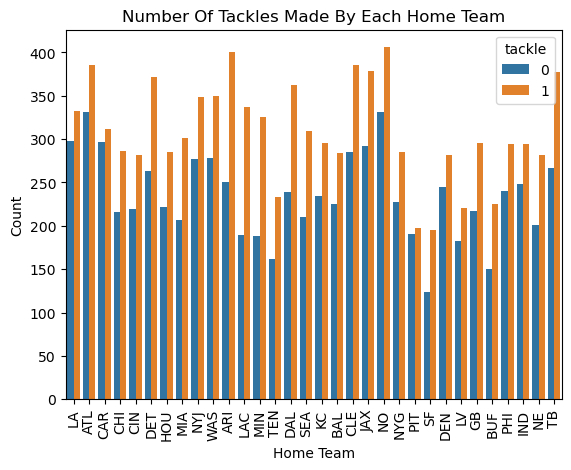

In [13]:
sns.countplot(x='homeTeamAbbr',hue='tackle',data=final_data)
plt.xticks(rotation='vertical')
plt.xlabel('Home Team')  
plt.ylabel("Count")
plt.title("Number Of Tackles Made By Each Home Team")   
plt.show()

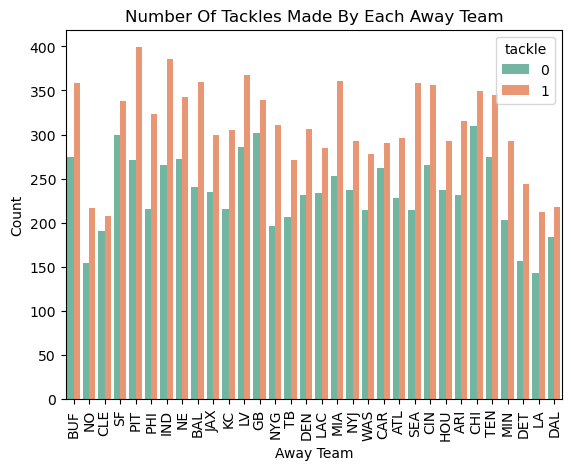

In [14]:
sns.countplot(x='visitorTeamAbbr',hue='tackle',data=final_data, palette = "Set2")
plt.xticks(rotation='vertical')
plt.xlabel('Away Team')  
plt.ylabel("Count")
plt.title("Number Of Tackles Made By Each Away Team") 
plt.show()

In [15]:
final_data2= final_data.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum', 'forcedFumble': 'sum', 'pff_missedTackle': 'sum'})
final_data2

displayName  tackle  assist  forcedFumble  pff_missedTackle
0    A'Shawn Robinson      16      18             0                 3
1        A.J. Epenesa       1       1             0                 5
2          A.J. Klein       3       1             0                 2
3         A.J. Parker      10       2             0                 0
4        A.J. Terrell      19       9             0                 8
..                ...     ...     ...           ...               ...
794         Zack Baun       1       1             0                 1
795    Zaire Franklin      55      28             0                12
796     Zaven Collins      39      24             1                13
797   Zech McPhearson       2       0             0                 0
798     Zyon McCollum       8       2             0                 4

[799 rows x 5 columns]

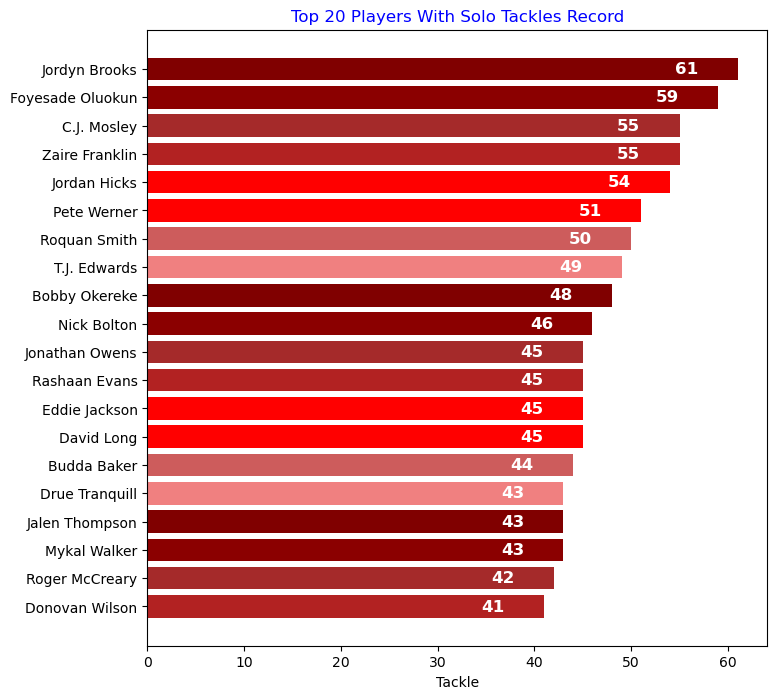

In [16]:
#Filtering out top 20 players with most tackles
final_data3= final_data2.sort_values(['tackle'], ascending=False).groupby('displayName').head()
final_data3a= final_data3.nlargest(n=20, columns=['tackle'])
final_data_a1= final_data3a.sort_values(by="tackle")
fig, ax = plt.subplots(figsize=(8,8))
bars= plt.barh(final_data_a1['displayName'], final_data_a1["tackle"], color= ['firebrick','brown','darkred','maroon','lightcoral', 'indianred','red','r'])
ax.bar_label(bars, padding=-45, color="white", fontsize= 12, label_type= 'edge', fmt= "%d", fontweight= 'bold')
plt.title("Top 20 Players With Solo Tackles Record", color= "blue")
plt.xlabel("Tackle")
plt.show()

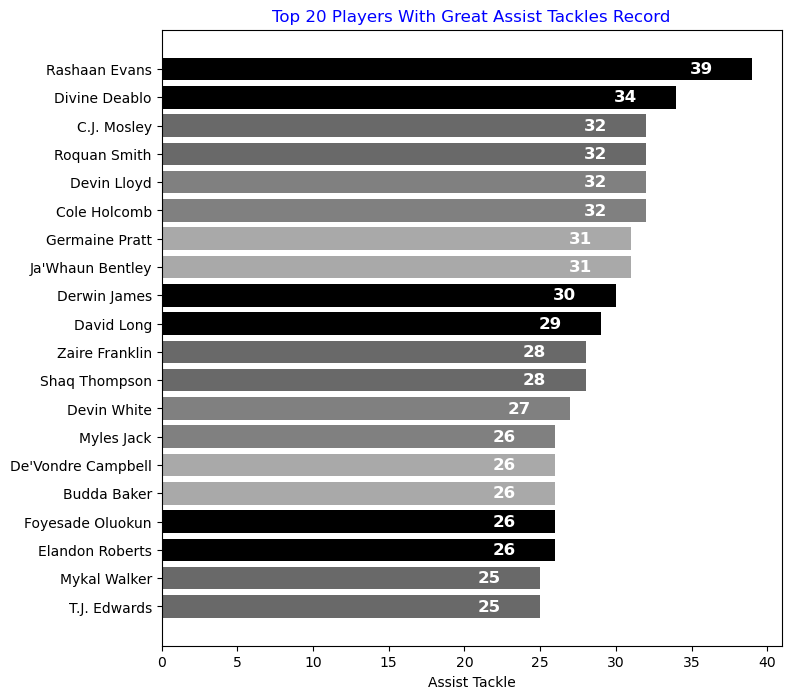

In [17]:

#Filtering out top 20 players with highest assist tackles
final_data4= final_data2.sort_values(['assist'], ascending=False).groupby('displayName').head()
final_data4a= final_data4.nlargest(n=20, columns=['assist'])
final_data_a2= final_data4a.sort_values(by="assist")
fig2, ax2 = plt.subplots(figsize=(8,8))
bars= plt.barh(final_data_a2['displayName'], final_data_a2["assist"], color= ['dimgray','dimgrey','black','k','darkgray','darkgrey', 'gray','grey'])
ax2.bar_label(bars, padding=-45, color="white", fontsize= 12, label_type= 'edge', fmt= "%d", fontweight= 'bold')
plt.title("Top 20 Players With Great Assist Tackles Record", color= 'blue')
plt.xlabel("Assist Tackle")
plt.show()

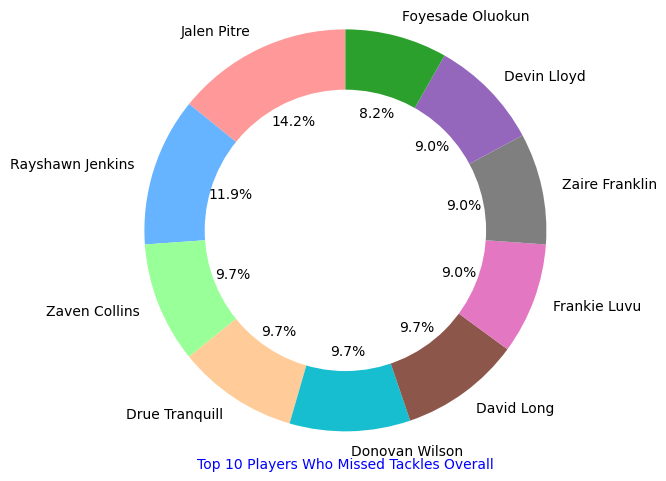

In [18]:
#Filtering out top 20 players with missed tackles
final_data5= final_data2.sort_values(['pff_missedTackle'], ascending=False).groupby('displayName').head()
final_data5a= final_data5.nlargest(n=10, columns=['pff_missedTackle'])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#17becf','#8c564b','#e377c2','#7f7f7f','#9467bd','#2ca02c']
fig3, ax3 = plt.subplots()
ax3.pie(final_data5a["pff_missedTackle"], colors = colors, labels=final_data5a["displayName"], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax3.axis('equal')  
plt.tight_layout()
plt.xlabel("Top 10 Players Who Missed Tackles Overall", color= "blue")
plt.show()

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_32552\649021486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="position", y="forcedFumble", data=final_data_a3, palette="Set1")


Text(0.5, 1.0, 'Positions With Most Fumbles')

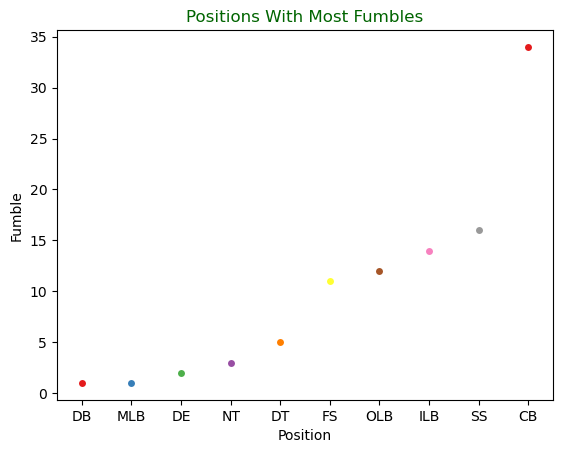

In [19]:
#Determining positions with most fumbles
final_data6= final_data.groupby(['position'], as_index=False).agg({'tackle': 'sum', 'assist':'sum', 'forcedFumble': 'sum', 'pff_missedTackle': 'sum'})
final_data_a3= final_data6.sort_values(by="forcedFumble")
sns.stripplot(x="position", y="forcedFumble", data=final_data_a3, palette="Set1")
plt.xlabel('Position')  
plt.ylabel("Fumble")
plt.title("Positions With Most Fumbles", color="darkgreen")

In [20]:
cornerbacks= final_data[["displayName","tackle","assist"]][final_data['position']=="CB"]
cb= cornerbacks.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum'})
Top10_cornerbacks= cb.nlargest(n=10, columns=['tackle'])

def color_creation(val):
    color = 'lightcoral' if val < 35 else 'red'
    return 'color: %s' % color

styled_table = Top10_cornerbacks.style.applymap(color_creation, subset=['tackle'])
styled_table

In [21]:
inside_linebacker= final_data[["displayName","tackle","assist"]][final_data['position']=="ILB"]
ilb= inside_linebacker.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum'})
Top10_inside_linebackers= ilb.nlargest(n=10, columns=['tackle'])

def color_creation(val):
    color = 'cornflowerblue' if val < 50 else 'blue'
    return 'color: %s' % color

styled_table = Top10_inside_linebackers.style.applymap(color_creation, subset=['tackle'])
styled_table

In [22]:
outside_linebacker= final_data[["displayName","tackle","assist"]][final_data['position']=="OLB"]
olb= outside_linebacker.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum'})
Top10_outside_linebackers= olb.nlargest(n=10, columns=['tackle'])

def color_creation(val):
    color = 'limegreen' if val < 39 else 'darkgreen'
    return 'color: %s' % color

styled_table = Top10_outside_linebackers.style.applymap(color_creation, subset=['tackle'])
styled_table

In [23]:
free_safety= final_data[["displayName","tackle","assist"]][final_data['position']=="FS"]
fs= free_safety.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum'})
Top10_free_safety= fs.nlargest(n=10, columns=['tackle'])

def color_creation(val):
    color = 'violet' if val < 39 else 'purple'
    return 'color: %s' % color

styled_table = Top10_free_safety.style.applymap(color_creation, subset=['tackle'])
styled_table

In [24]:
strong_safety= final_data[["displayName","tackle","assist"]][final_data['position']=="SS"]
ss= strong_safety.groupby(['displayName'], as_index=False).agg({'tackle': 'sum', 'assist':'sum'})
Top10_strong_safety= ss.nlargest(n=10, columns=['tackle'])

def color_creation(val):
    color = 'darkgrey' if val < 38 else 'gray'
    return 'color: %s' % color

styled_table = Top10_strong_safety.style.applymap(color_creation, subset=['tackle'])
styled_table

In [25]:
cross_tab = pd.crosstab(index=final_data['height'],
                        columns=final_data['position'])
cross_tab

position   CB  DB   DE   DT   FS  ILB  MLB   NT  OLB   SS
height                                                   
172        37   0    0    0    0    0    0    0    0   38
175       364   0    0    0  139    0    0    0    0    0
177       371   0    0    0  184    0    0    0    0  203
180       856   0   17    0  412  205    0    0   57  394
182       788   0    2   78  408  590   42    7  270  637
185       703   0   14  148  512  840   16   16  218  478
187       473   0  107  167  237  891  146   54  430  106
190       163  46  298  492   24  500    2  194  530   96
195         0   0  376  184    0   67    0   31  518    0
198         0   0  175   80    0    0    0    0   26    0
200         0   0   62   38    0    0    0   20   28    0
203         0   0   22    0    0    0    0    0    0    0
210        47   0  402  489   61  180   49  129  431   11

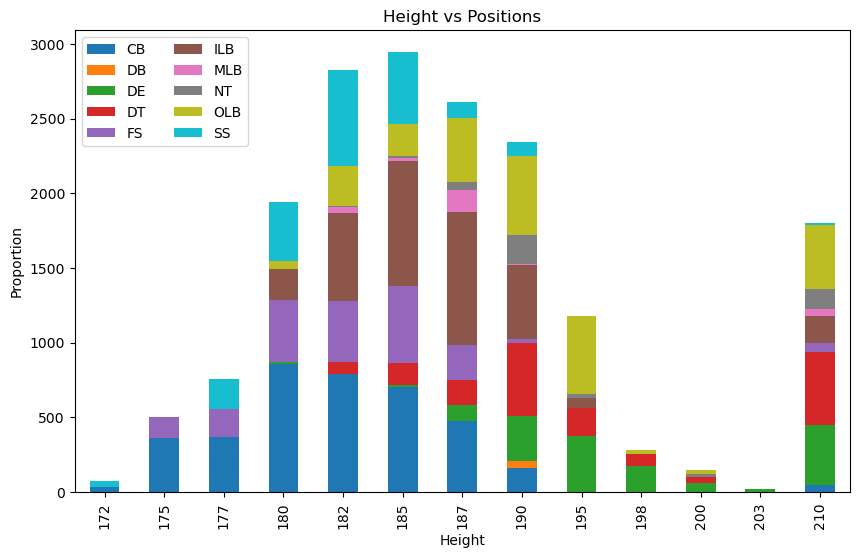

In [26]:
cross_tab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.title("Height vs Positions")
plt.show()

In [28]:
victory= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/victory.csv")
victory

gameId victory
0    2022090800     BUF
1    2022091100      NO
2    2022091101     CLE
3    2022091102     CHI
4    2022091103     PIT
..          ...     ...
131  2022110607     MIN
132  2022110608     SEA
133  2022110609      TB
134  2022110610      KC
135  2022110700     BAL

[136 rows x 2 columns]

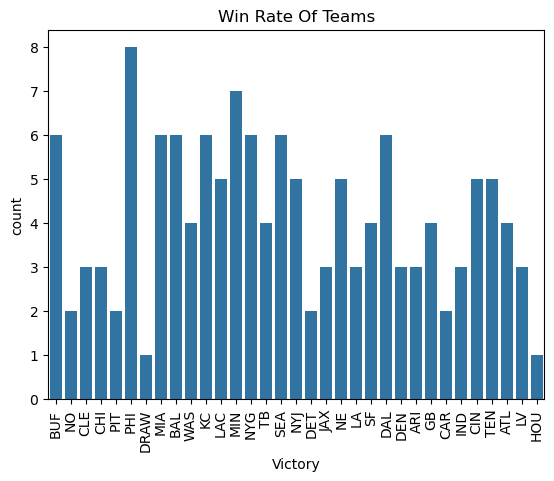

In [29]:
sns.countplot(x ='victory', data = victory)
plt.xticks(rotation='vertical')
plt.xlabel("Victory")
plt.title("Win Rate Of Teams")
plt.show()

In [30]:
#If a player has a tackle indicator 1 and an assist indicator 0, then it's a solo tackle.
#If a player has a tackle indicator 1 and an assist indicator 1, then it's considered a part of a gang tackle.

tackles['tackleType'] = 'Solo'  # Initialize with 'Solo' for all rows

#Updating the 'tackleType' based on the conditions
tackles.loc[(tackles['tackle'] == 1) & (tackles['assist'] == 0), 'tackleType'] = 'Solo'
tackles.loc[(tackles['tackle'] == 1) & (tackles['assist'] == 1), 'tackleType'] = 'Gang'

#To represent 'Gang' as 1 and 'Solo' as 0 in a separate column, we can create another column
tackles['tackleTypeBinary'] = tackles['tackleType'].apply(lambda x: 1 if x == 'Solo' else 0)
tackles["tackleType"].value_counts()

tackleType
Solo    17426
Name: count, dtype: int64

In [31]:
#Creating a football field
def nfl_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    
    rectangle = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig4, ax4 = plt.subplots(1, figsize=figsize)
    ax4.add_patch(rectangle)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax4.add_patch(ez1)
        ax4.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20, 
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax4.plot([x, x], [0.4, 0.7], color='white')
        ax4.plot([x, x], [53.0, 52.5], color='white')
        ax4.plot([x, x], [22.91, 23.57], color='white')
        ax4.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig4, ax4

In [34]:
tracking_1= pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/tracking_week_1.csv")

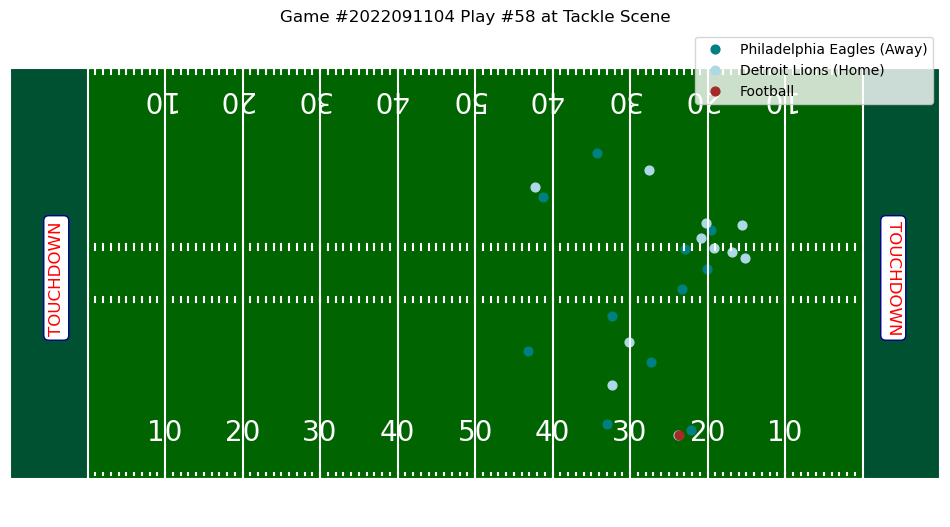

In [35]:
club_1 = tracking_1.query('gameId == 2022091104 and playId == 58 and club == "PHI"')
club_2 = tracking_1.query('gameId == 2022091104 and playId == 58 and club == "DET"')
football_1= tracking_1.query('gameId == 2022091104 and playId == 58 and club == "football"')

fig5, ax5 = nfl_football_field()
club_1.query('event == "tackle"').plot(x='x', y='y', kind='scatter', ax=ax5, color='teal', s=40, label='Philadelphia Eagles (Away)')
club_2.query('event == "tackle"').plot(x='x', y='y', kind='scatter', ax=ax5, color='lightblue', s=40, label='Detroit Lions (Home)')
football_1.query('event == "tackle"').plot(x='x', y='y', kind='scatter', ax=ax5, color='brown', s=40, label='Football')

ax5.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax5.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')

plt.title('Game #2022091104 Play #58 at Tackle Scene')
plt.legend(loc='upper right')
plt.show()

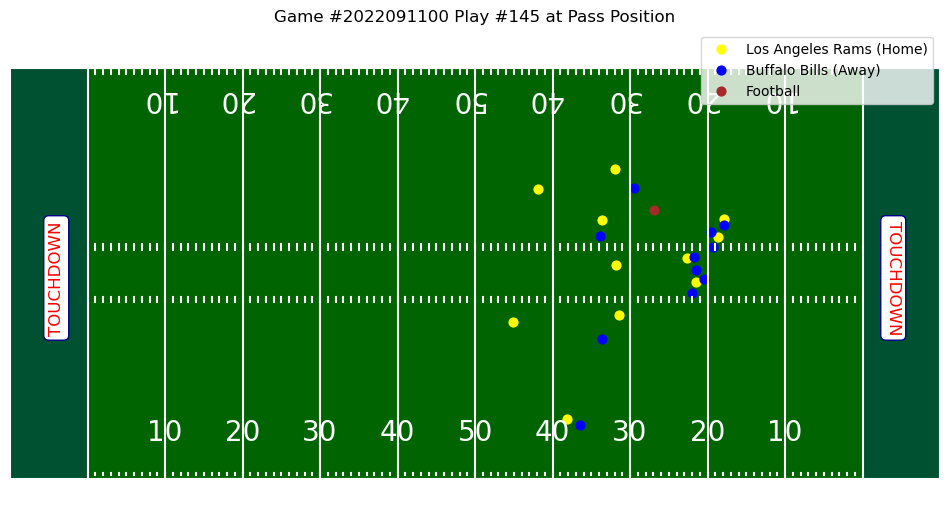

In [36]:
club_3 = tracking_1.query('gameId == 2022090800 and playId == 56 and club == "LA"')
club_4 = tracking_1.query('gameId == 2022090800 and playId == 56 and club == "BUF"')
football_2= tracking_1.query('gameId == 2022090800 and playId == 56 and club == "football"')

fig6, ax6 = nfl_football_field()
club_3.query('event == "pass_arrived"').plot(x='x', y='y', kind='scatter', ax=ax6, color='yellow', s=40, label='Los Angeles Rams (Home)')
club_4.query('event == "pass_arrived"').plot(x='x', y='y', kind='scatter', ax=ax6, color='blue', s=40, label='Buffalo Bills (Away)')
football_2.query('event == "pass_arrived"').plot(x='x', y='y', kind='scatter', ax=ax6, color='brown', s=40, label='Football')

ax6.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax6.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')

plt.title('Game #2022091100 Play #145 at Pass Position')
plt.legend(loc='upper right')
plt.show()

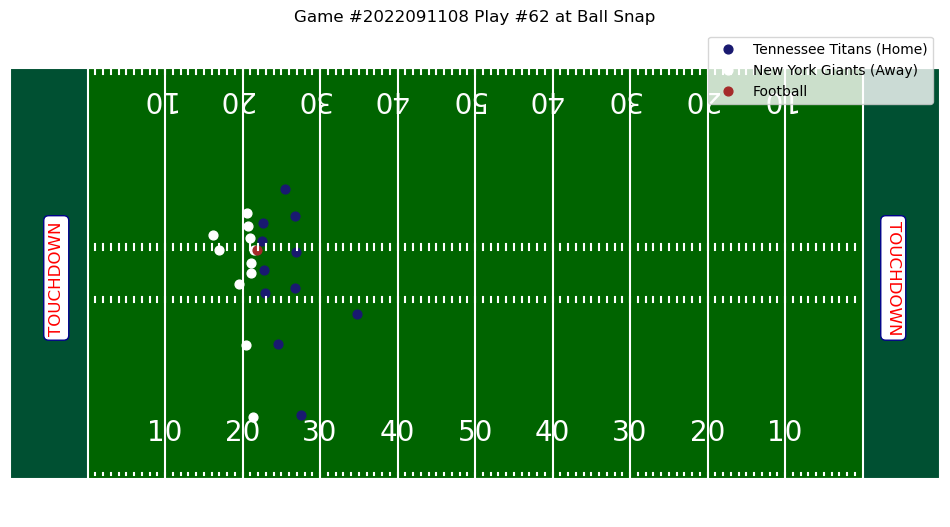

In [37]:
club_5 = tracking_1.query('gameId == 2022091108 and playId == 62 and club == "TEN"')
club_6 = tracking_1.query('gameId == 2022091108 and playId == 62 and club == "NYG"')
football_3= tracking_1.query('gameId == 2022091108 and playId == 62 and club == "football"')

fig7, ax7 = nfl_football_field()
club_5.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax7, color='midnightblue', s=40, label='Tennessee Titans (Home)')
club_6.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax7, color='white', s=40, label='New York Giants (Away)')
football_3.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax7, color='brown', s=40, label='Football')

ax7.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax7.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')

plt.title('Game #2022091108 Play #62 at Ball Snap')
plt.legend(loc='upper right')
plt.show()

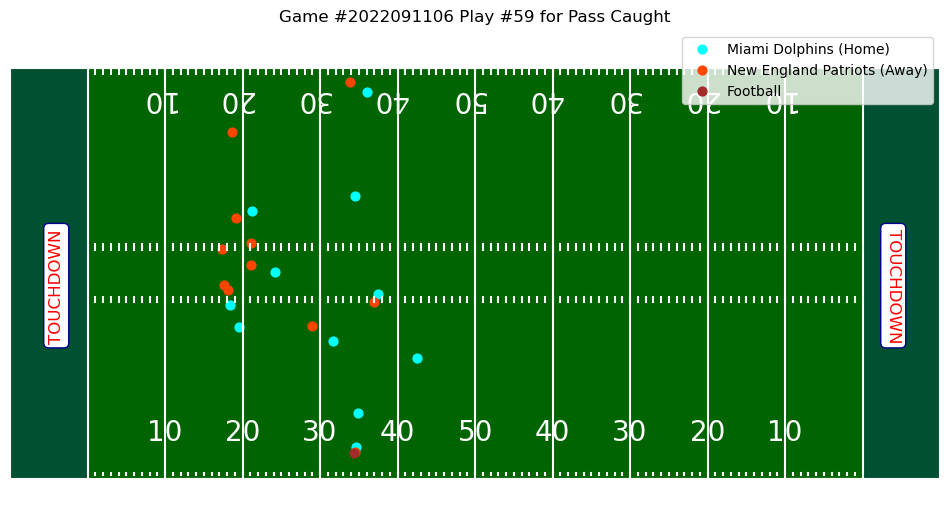

In [38]:
club_7 = tracking_1.query('gameId == 2022091106 and playId == 59 and club == "MIA"')
club_8 = tracking_1.query('gameId == 2022091106 and playId == 59 and club == "NE"')
football_4= tracking_1.query('gameId == 2022091106 and playId == 59 and club == "football"')

fig8, ax8 = nfl_football_field()
club_7.query('event == "pass_outcome_caught"').plot(x='x', y='y', kind='scatter', ax=ax8, color='cyan', s=40, label='Miami Dolphins (Home)')
club_8.query('event == "pass_outcome_caught"').plot(x='x', y='y', kind='scatter', ax=ax8, color='orangered', s=40, label='New England Patriots (Away)')
football_4.query('event == "pass_outcome_caught"').plot(x='x', y='y', kind='scatter', ax=ax8, color='brown', s=40, label='Football')
ax8.annotate('TOUCHDOWN', xy=(113, 18), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)

ax8.annotate('TOUCHDOWN', xy=(5, 18), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')

plt.title('Game #2022091106 Play #59 for Pass Caught')
plt.legend(loc='upper right')
plt.show()

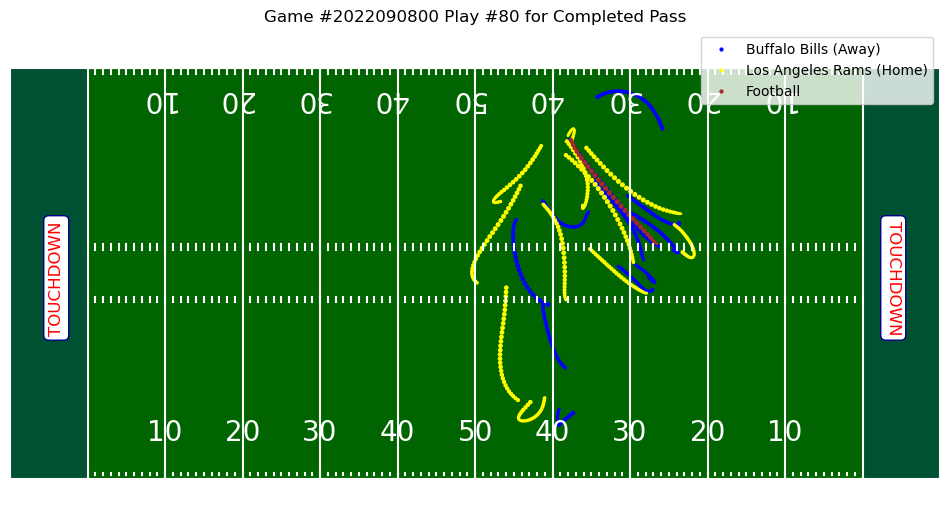

In [39]:
fig9, ax9 = nfl_football_field()

buffalo_data = tracking_1.query("gameId == 2022090800 and playId == 80 and club == 'BUF'")
rams_data = tracking_1.query("gameId == 2022090800 and playId == 80 and club == 'LA'")
football_5= tracking_1.query("gameId == 2022090800 and playId == 80 and club == 'football'")

buffalo_data.plot(x='x', y='y', kind='scatter', ax=ax9, color='blue', s=buffalo_data['dis']*10, label='Buffalo Bills (Away)')
rams_data.plot(x='x', y='y', kind='scatter', ax=ax9, color='yellow', s=rams_data['dis']*10, label='Los Angeles Rams (Home)')
football_5.plot(x='x', y='y', kind='scatter', ax=ax9, color='brown', s=football_5['dis']*10, label='Football')
ax9.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax9.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')

plt.title('Game #2022090800 Play #80 for Completed Pass')
plt.legend(loc="upper right")
plt.show()

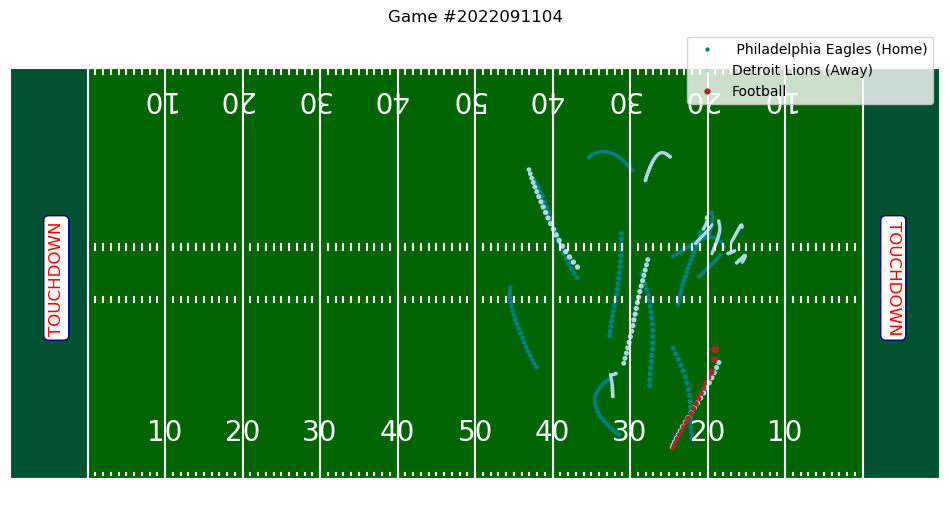

In [40]:
fig10, ax10 = nfl_football_field()

phi_data = tracking_1.query('gameId == 2022091104 and playId == 58 and club == "PHI"')
det_data = tracking_1.query('gameId == 2022091104 and playId == 58 and club == "DET"')
football_6= tracking_1.query('gameId == 2022091104 and playId == 58 and club == "football"')

phi_data.plot(x='x', y='y', kind='scatter', ax=ax10, color='teal', s=phi_data['dis']*10, label=' Philadelphia Eagles (Home)')
det_data.plot(x='x', y='y', kind='scatter', ax=ax10, color='lightblue', s=det_data['dis']*10, label='Detroit Lions (Away)')
football_6.plot(x='x', y='y', kind='scatter', ax=ax10, color='brown', s=football_6['dis']*10, label='Football')
ax10.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax10.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')
plt.title('Game #2022091104')
plt.legend(loc='upper right')
plt.show()

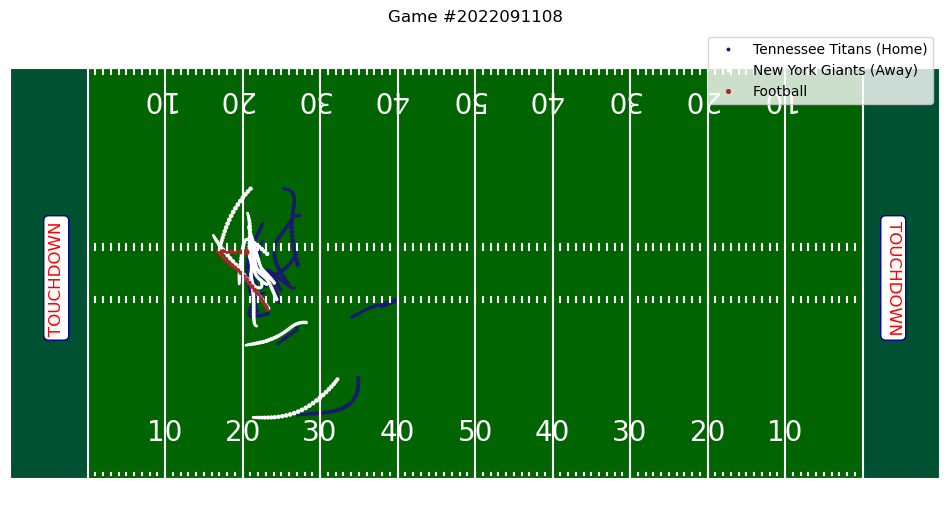

In [41]:
fig11, ax11 = nfl_football_field()

titans_data = tracking_1.query('gameId == 2022091108 and playId == 62 and club == "TEN"')
giants_data = tracking_1.query('gameId == 2022091108 and playId == 62 and club == "NYG"')
football_7= tracking_1.query('gameId == 2022091108 and playId == 62 and club == "football"')

titans_data.plot(x='x', y='y', kind='scatter', ax=ax11, color='midnightblue', s=titans_data['dis']*10, label='Tennessee Titans (Home)')
giants_data.plot(x='x', y='y', kind='scatter', ax=ax11, color='white', s=giants_data['dis']*10, label='New York Giants (Away)')
football_7.plot(x='x', y='y', kind='scatter', ax=ax11, color='brown', s=football_7['dis']*10, label='Football')
ax11.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax11.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')
plt.title('Game #2022091108')
plt.legend(loc='upper right')
plt.show()

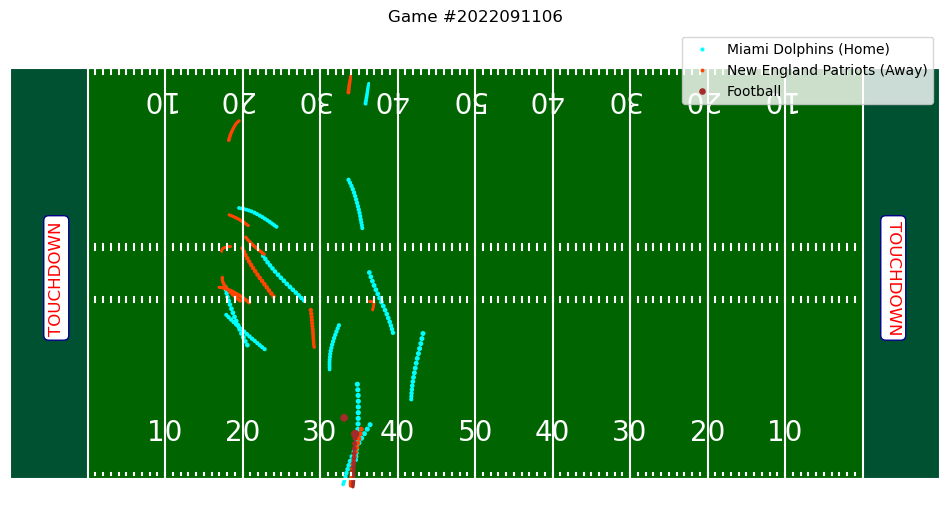

In [42]:
fig12, ax12 = nfl_football_field()

dolphins_data = tracking_1.query('gameId == 2022091106 and playId == 59 and club == "MIA"')
patriots_data = tracking_1.query('gameId == 2022091106 and playId == 59 and club == "NE"')
football_8= tracking_1.query('gameId == 2022091106 and playId == 59 and club == "football"')

dolphins_data.plot(x='x', y='y', kind='scatter', ax=ax12, color='cyan', s=dolphins_data['dis']*10, label='Miami Dolphins (Home)')
patriots_data.plot(x='x', y='y', kind='scatter', ax=ax12, color='orangered', s=patriots_data['dis']*10, label='New England Patriots (Away)')
football_8.plot(x='x', y='y', kind='scatter', ax=ax12, color='brown', s=football_8['dis']*10, label='Football')
ax12.annotate('TOUCHDOWN', xy=(113, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation=-90)
ax12.annotate('TOUCHDOWN', xy=(5, 19), xytext=(0, 0), color='red', size=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkblue', facecolor='white'),
             textcoords='offset points', rotation='vertical')
plt.title('Game #2022091106')
plt.legend(loc='upper right')
plt.show()


Play Outcomes:
passResult
C    5634
R     471
Name: count, dtype: int64


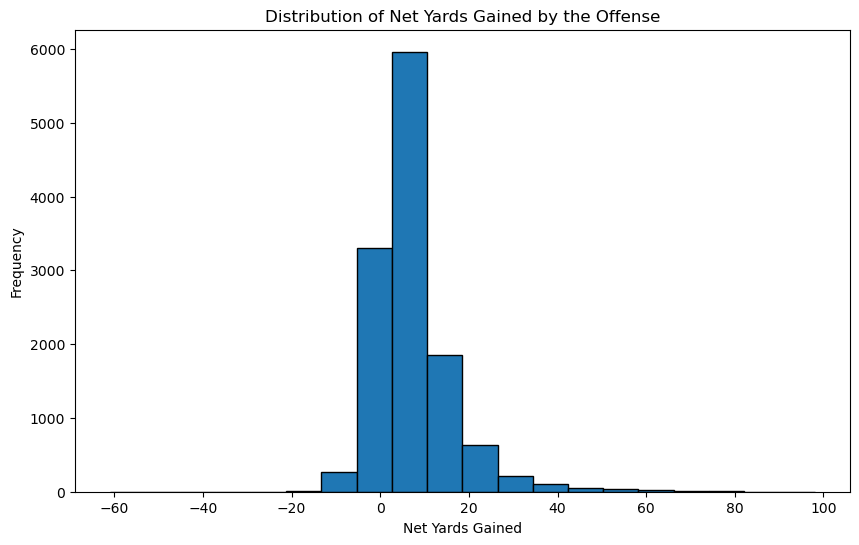

In [43]:
play_outcomes = plays['passResult'].value_counts()
print("\nPlay Outcomes:")
print(play_outcomes)

#Reviewing net yards gained by the offense on each play
plt.figure(figsize=(10, 6))
plt.hist(plays['playResult'], bins=20, edgecolor='black')
plt.title('Distribution of Net Yards Gained by the Offense')
plt.xlabel('Net Yards Gained')
plt.ylabel('Frequency')
plt.show()

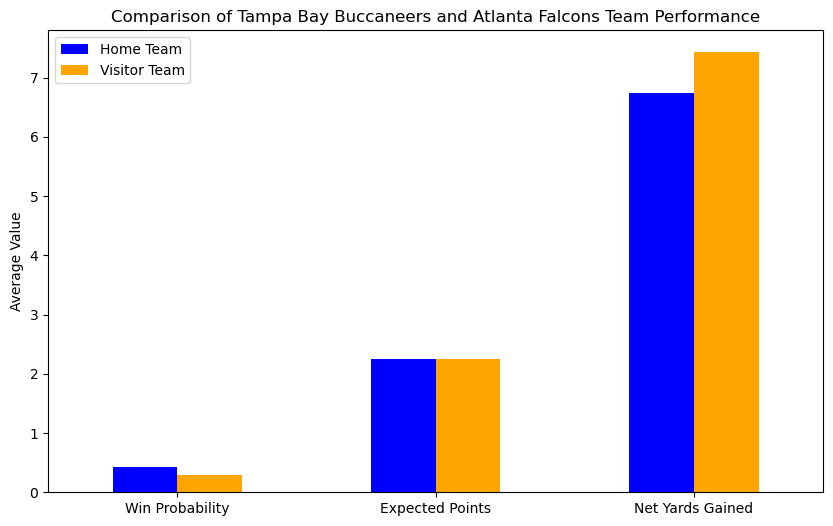

In [44]:
# Filtering data for home team and visitor team
home_team_data = plays[plays['possessionTeam'] == 'TB']
visitor_team_data = plays[plays['defensiveTeam'] == 'ATL']

# Calculating average win probability, expected points, and net yards gained for home team
avg_home_win_prob = home_team_data['preSnapHomeTeamWinProbability'].mean()
avg_home_expected_points = home_team_data['expectedPoints'].mean()
avg_home_net_yards_gained = home_team_data['playResult'].mean()

# Calculating average win probability, expected points, and net yards gained for visitor team
avg_visitor_win_prob = visitor_team_data['preSnapVisitorTeamWinProbability'].mean()
avg_visitor_expected_points = visitor_team_data['expectedPoints'].mean()
avg_visitor_net_yards_gained = visitor_team_data['playResult'].mean()

categories = ['Win Probability', 'Expected Points', 'Net Yards Gained']
home_team_values = [avg_home_win_prob, avg_home_expected_points, avg_home_net_yards_gained]
visitor_team_values = [avg_visitor_win_prob, avg_visitor_expected_points, avg_visitor_net_yards_gained]

df_comparison = pd.DataFrame({'Home Team': home_team_values, 'Visitor Team': visitor_team_values}, index=categories)
ax = df_comparison.plot(kind='bar', rot=0, figsize=(10, 6), color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Tampa Bay Buccaneers and Atlanta Falcons Team Performance')
plt.show()

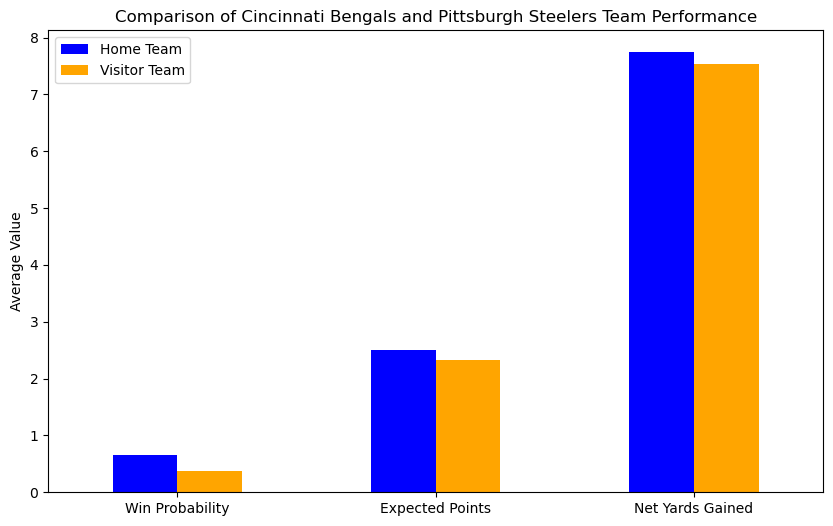

In [45]:
home_team_data = plays[plays['possessionTeam'] == 'CIN']
visitor_team_data = plays[plays['defensiveTeam'] == 'PIT']

avg_home_win_prob = home_team_data['preSnapHomeTeamWinProbability'].mean()
avg_home_expected_points = home_team_data['expectedPoints'].mean()
avg_home_net_yards_gained = home_team_data['playResult'].mean()

avg_visitor_win_prob = visitor_team_data['preSnapVisitorTeamWinProbability'].mean()
avg_visitor_expected_points = visitor_team_data['expectedPoints'].mean()
avg_visitor_net_yards_gained = visitor_team_data['playResult'].mean()

categories = ['Win Probability', 'Expected Points', 'Net Yards Gained']
home_team_values = [avg_home_win_prob, avg_home_expected_points, avg_home_net_yards_gained]
visitor_team_values = [avg_visitor_win_prob, avg_visitor_expected_points, avg_visitor_net_yards_gained]

df_comparison = pd.DataFrame({'Home Team': home_team_values, 'Visitor Team': visitor_team_values}, index=categories)
ax = df_comparison.plot(kind='bar', rot=0, figsize=(10, 6), color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Cincinnati Bengals and Pittsburgh Steelers Team Performance')
plt.show()

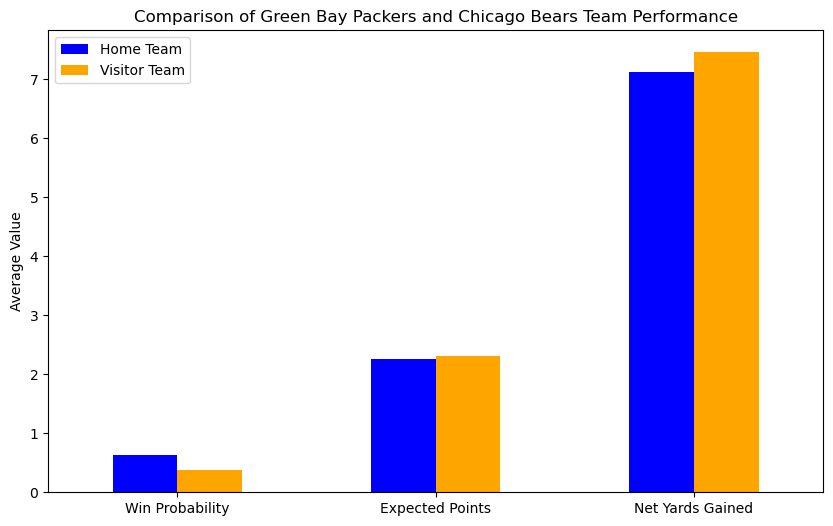

In [46]:
home_team_data = plays[plays['possessionTeam'] == 'GB']
visitor_team_data = plays[plays['defensiveTeam'] == 'CHI']

avg_home_win_prob = home_team_data['preSnapHomeTeamWinProbability'].mean()
avg_home_expected_points = home_team_data['expectedPoints'].mean()
avg_home_net_yards_gained = home_team_data['playResult'].mean()

avg_visitor_win_prob = visitor_team_data['preSnapVisitorTeamWinProbability'].mean()
avg_visitor_expected_points = visitor_team_data['expectedPoints'].mean()
avg_visitor_net_yards_gained = visitor_team_data['playResult'].mean()

categories = ['Win Probability', 'Expected Points', 'Net Yards Gained']
home_team_values = [avg_home_win_prob, avg_home_expected_points, avg_home_net_yards_gained]
visitor_team_values = [avg_visitor_win_prob, avg_visitor_expected_points, avg_visitor_net_yards_gained]

df_comparison = pd.DataFrame({'Home Team': home_team_values, 'Visitor Team': visitor_team_values}, index=categories)
ax = df_comparison.plot(kind='bar', rot=0, figsize=(10, 6), color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Green Bay Packers and Chicago Bears Team Performance')
plt.show()

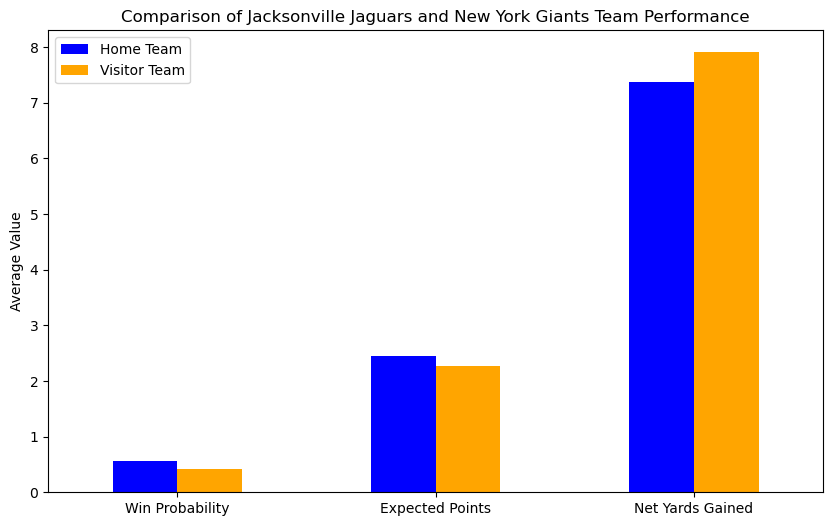

In [47]:
home_team_data = plays[plays['possessionTeam'] == 'JAX']
visitor_team_data = plays[plays['defensiveTeam'] == 'NYG']

avg_home_win_prob = home_team_data['preSnapHomeTeamWinProbability'].mean()
avg_home_expected_points = home_team_data['expectedPoints'].mean()
avg_home_net_yards_gained = home_team_data['playResult'].mean()

avg_visitor_win_prob = visitor_team_data['preSnapVisitorTeamWinProbability'].mean()
avg_visitor_expected_points = visitor_team_data['expectedPoints'].mean()
avg_visitor_net_yards_gained = visitor_team_data['playResult'].mean()

categories = ['Win Probability', 'Expected Points', 'Net Yards Gained']
home_team_values = [avg_home_win_prob, avg_home_expected_points, avg_home_net_yards_gained]
visitor_team_values = [avg_visitor_win_prob, avg_visitor_expected_points, avg_visitor_net_yards_gained]

df_comparison = pd.DataFrame({'Home Team': home_team_values, 'Visitor Team': visitor_team_values}, index=categories)
ax = df_comparison.plot(kind='bar', rot=0, figsize=(10, 6), color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Jacksonville Jaguars and New York Giants Team Performance')
plt.show()

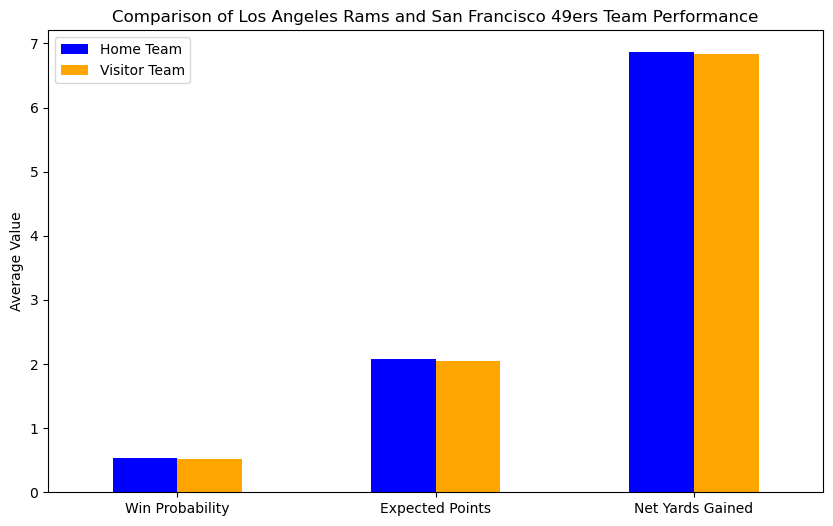

In [48]:
home_team_data = plays[plays['possessionTeam'] == 'LA']
visitor_team_data = plays[plays['defensiveTeam'] == 'SF']

avg_home_win_prob = home_team_data['preSnapHomeTeamWinProbability'].mean()
avg_home_expected_points = home_team_data['expectedPoints'].mean()
avg_home_net_yards_gained = home_team_data['playResult'].mean()

avg_visitor_win_prob = visitor_team_data['preSnapVisitorTeamWinProbability'].mean()
avg_visitor_expected_points = visitor_team_data['expectedPoints'].mean()
avg_visitor_net_yards_gained = visitor_team_data['playResult'].mean()

categories = ['Win Probability', 'Expected Points', 'Net Yards Gained']
home_team_values = [avg_home_win_prob, avg_home_expected_points, avg_home_net_yards_gained]
visitor_team_values = [avg_visitor_win_prob, avg_visitor_expected_points, avg_visitor_net_yards_gained]

df_comparison = pd.DataFrame({'Home Team': home_team_values, 'Visitor Team': visitor_team_values}, index=categories)
ax = df_comparison.plot(kind='bar', rot=0, figsize=(10, 6), color=['blue', 'orange'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Los Angeles Rams and San Francisco 49ers Team Performance')
plt.show()

In [49]:
fig01= px.sunburst(plays, path=["quarter", "offenseFormation"], color_discrete_sequence=px.colors.sequential.Rainbow)
fig01.update_layout(title_text='Offense Formation Leveraged In Each Quarter')
fig01

In [50]:
#Merging tackles dataset with plays dataset
df = tackles.merge(plays, on='playId', how='left')
df.head(100)

gameId_x  playId  nflId  tackle  assist  forcedFumble  pff_missedTackle  \
0   2022090800     101  42816       1       0             0                 0   
1   2022090800     101  42816       1       0             0                 0   
2   2022090800     101  42816       1       0             0                 0   
3   2022090800     101  42816       1       0             0                 0   
4   2022090800     101  42816       1       0             0                 0   
..         ...     ...    ...     ...     ...           ...               ...   
95  2022091100    3778  53489       1       0             0                 0   
96  2022091101    1691  53481       1       0             0                 0   
97  2022091101    1691  53481       1       0             0                 0   
98  2022091101    1744  44903       1       0             0                 0   
99  2022091101    1744  44903       1       0             0                 0   

   tackleType  tackleTypeBinary    gameId_y  ...  \
0        Solo                 1  2022091807  ...   
1        Solo                 1  2022100905  ...   
2        Solo                 1  2022091105  ...   
3        Solo                 1  2022102300  ...   
4        Solo                 1  2022100210  ...   
..        ...               ...         ...  ...   
95       Solo                 1  2022101605  ...   
96       Solo                 1  2022091101  ...   
97       Solo                 1  2022103001  ...   
98       Solo                 1  2022091101  ...   
99       Solo                 1  2022092504  ...   

    preSnapHomeTeamWinProbability preSnapVisitorTeamWinProbability  \
0                        0.761791                         0.238209   
1                        0.641551                         0.358449   
2                        0.271203                         0.728797   
3                        0.540985                         0.459015   
4                        0.600216                         0.399784   
..                            ...                              ...   
95                       0.511067                         0.488933   
96                       0.163985                         0.836015   
97                       0.444694                         0.555306   
98                       0.191883                         0.808117   
99                       0.640380                         0.359620   

   homeTeamWinProbabilityAdded  visitorTeamWinProbilityAdded  expectedPoints  \
0                    -0.027336                      0.027336        2.069801   
1                    -0.026457                      0.026457        0.868228   
2                     0.006338                     -0.006338        0.568326   
3                    -0.007479                      0.007479        2.669837   
4                     0.007764                     -0.007764        2.083980   
..                         ...                           ...             ...   
95                   -0.326631                      0.326631        1.802851   
96                   -0.003758                      0.003758        0.862714   
97                   -0.002045                      0.002045        1.168622   
98                    0.045600                     -0.045600        2.378812   
99                    0.007261                     -0.007261        3.993537   

    expectedPointsAdded foulName1 foulName2 foulNFLId1  foulNFLId2  
0              0.239078       NaN       NaN        NaN         NaN  
1              1.239702       NaN       NaN        NaN         NaN  
2             -1.059010       NaN       NaN        NaN         NaN  
3             -0.386598       NaN       NaN        NaN         NaN  
4              0.118583       NaN       NaN        NaN         NaN  
..                  ...       ...       ...        ...         ...  
95             5.197149       NaN       NaN        NaN         NaN  
96            -0.047932       NaN       NaN        NaN

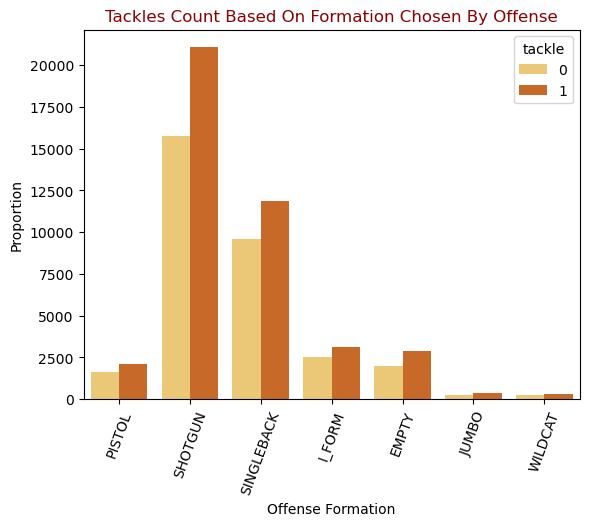

In [51]:
sns.countplot(x='offenseFormation', data=df, hue='tackle', palette="YlOrBr")
plt.xticks(rotation=70)
plt.xlabel("Offense Formation")
plt.ylabel("Proportion")
plt.title("Tackles Count Based On Formation Chosen By Offense", color= "darkred")
plt.show()

# CONCLUSION
We wrap up our exploration into the dynamics of different datasets. Navigating through this data landscape has not only uncovered valuable insights but has also allowed us to unearth nuanced understandings of key aspects such as player performance on tackles, tackle type used, formation used by the offensive team for yardage etc. Now, let's distill our journey into a concise summary, capturing the pivotal findings and unveiling the impactful implications derived from this in-depth analysis. Some of the conclusions are as follows:

1) Initially we have dived into extracting the number of tackles employed by each home team and each away team in 2022 season. From the sources we generated, it turns out that New Orleans Saints has secured top spot on the tackles achieved on their home ground. While Pittsburgh Steelers secured 1st in away matches. 

2) 20 players have been filtered out based on great tackle performance. Jordyn Brooks from Seattle Seahawks tops the list while Rashaan Evans tops the list of highest assist tackles made.

3) 10 players were subsequently filtered out to determine who has missed most tackles. From this finding, it is known that Jalen Pitre has the highest percentage for the overall missed tackles till week 9 games.

4) Relation between height and tackles and between weight and tackles have been assessed to check their impact on tackles. Apparently weight influences tackles made by players. Generally, a heavier player may have more mass and, consequently, more tackling power. This extra weight can contribute to a stronger impact when making contact with an opponent, making it more difficult for the ball carrier to break the tackle. While height doesn't impact the tackles made since p-value is greater than 0.05. While height can have some influence on a player's style and approach to tackling, it's generally not considered a direct or primary factor in a player's ability to make tackles. Successful tackling involves a combination of factors such as reading the play, anticipation, speed, and physicality. 

5) DE and DT positions have taller players since tall defensive ends can use their long arms to their advantage when engaging with offensive linemen. This length allows them to create separation and leverage, making it difficult for blockers to control them. This is especially important in pass-rushing situations where they aim to get to the quarterback.They can also can disrupt the quarterback's passing lanes by raising their arms to deflect or block passes. 

6) The histogram shows that most plays result in a small gain of yards, with the most frequent outcome being 0 yards gained. There are also a significant number of plays that result in a loss of yards, as shown by the bars on the left side of the histogram. However, there are also a few plays that result in large gains of yards, as shown by the bars on the right side of the histogram. The overall shape of the histogram is right-skewed, which means that there are more plays that result in a small gain of yards than there are plays that result in a large gain of yards. This is because it is more common for an offense to gain a few yards on a play than it is for them to gain a lot of yards.

7) In Sunburst plot, it is observed that shotgun is chosen the most by offensive teams as formation in each quarter because of numerous advantages it offers like passing efficiency where the quarterback starts to play a few yards behind the line of scrimmage, giving them a clearer view of the field. This extra distance can be beneficial for passing plays, as it provides the quarterback with more time to read the defense, make decisions, and execute accurate throws, quick release, versatility etc. It is the most preferred in 4th quarter because in late-game situations, especially during the two-minute drill when a team is trying to score quickly to catch up or take the lead. It allows the quarterback to receive the snap quickly and make rapid decisions in passing situations.

8) Finally shotgun formation has seen most tackles from the defensive team even though it is not accurately right because passing plays from the shotgun often involve receivers running routes in open space. This can lead to more open-field tackles by defenders, especially in the secondary.Another reason is that offense teams are more likely to use the shotgun formation in longer down-and-distance situations, such as third-and-long. Defenses may be more focused on making tackles in such situations to prevent the offense from converting the first down.